In [5]:
!pip install -q kaggle

In [8]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d uciml/indian-liver-patient-records

  0% 0.00/7.68k [00:00<?, ?B/s]
100% 7.68k/7.68k [00:00<00:00, 9.68MB/s]


In [14]:
!unzip indian-liver-patient-records.zip

Archive:  indian-liver-patient-records.zip
  inflating: indian_liver_patient.csv  


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dataset = pd.read_csv('/content/indian_liver_patient.csv')

In [17]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [18]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [19]:
dataset.shape


(583, 11)

In [20]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [21]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [22]:
dataset.duplicated().sum()


13

In [23]:
dataset = dataset.drop_duplicates()
print( dataset.shape )

(570, 11)


In [24]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<Axes: xlabel='Albumin_and_Globulin_Ratio'>

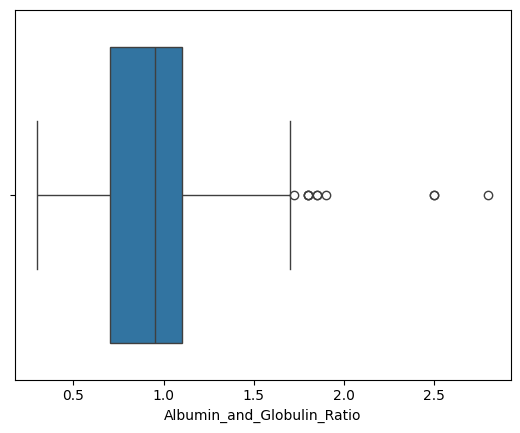

In [25]:
sns.boxplot(data = dataset, x='Albumin_and_Globulin_Ratio')

In [26]:
dataset['Albumin_and_Globulin_Ratio'].mode()

0    1.0
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [27]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

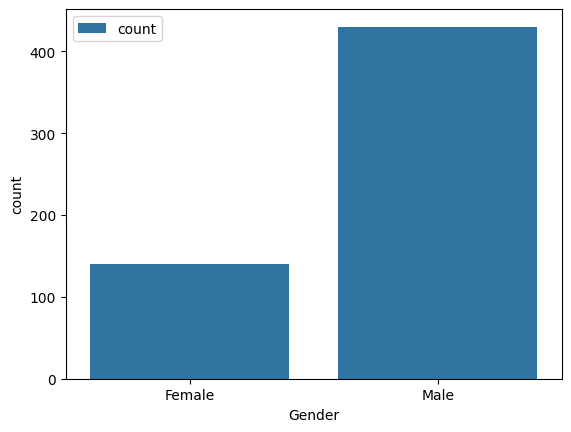

In [28]:
import seaborn as sns
sns.countplot(data = dataset, x='Gender', label='count')

In [30]:
Male, Female = dataset['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female: ',Female)

Number of patients that are male:  430
Number of patients that are female:  140


In [31]:
def partition(x):
   if x == 'Male':
     return 1
   return 0
dataset['Gender'] = dataset['Gender'].map(partition)

In [33]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [34]:
def partition(x):
  if x==2:
    return 0
  return 1
dataset['Dataset'] = dataset['Dataset'].map(partition)

In [36]:
dataset['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 570, dtype: int64